# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [3]:
# insert code here
actual_counts = results['actual'].value_counts()
print(actual_counts)


1.0    3000
0.0    2000
Name: actual, dtype: int64




According to the output, there are 2000 instances of the real event being False and 3000 instances of the actual event being True (represented by 1.0). (represented by 0.0).

The model's predictions could be biased towards the majority class because there is a small imbalance in the classes, with the number of True instances being higher than the number of False instances. (in this case, the True class). This can be addressed by employing strategies like undersampling the majority class, oversampling the minority class, or combining both to balance the classes and enhance model performance.



## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

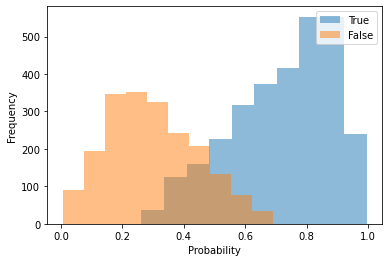

In [4]:
# insert code here
plt.hist(results[results.actual == 1]['prob'], alpha=0.5, label='True')
plt.hist(results[results.actual == 0]['prob'], alpha=0.5, label='False')
plt.legend(loc='upper right')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


Most of the odds fall between 0.5 and 1.0, with the True class histogram being skewed to the right. A peak near 0.2 and another peak near 0.7 are located in the False class's histogram, which is more equally spaced. The amount of False probabilities that are greater than 0.9 is also quite large.

As a result, it can be inferred that the model is more accurate at predicting True occurrences than False events. In terms of True events, the model is more certain, whereas False events, it is less certain. The model might be overconfident in some situations, which could result in false negatives when forecasting False events. Overall, the probability distribution points to the possibility of some dataset imbalance, which might skew the model's forecasts.



## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [11]:
# insert code here
from sklearn.metrics import confusion_matrix

y_pred = np.where(results['prob'] >= 0.5, 1, 0)
cm = confusion_matrix(results['actual'], y_pred)
print(cm)


[[1790  210]
 [ 377 2623]]


According to the confusion matrix, there are 377 false positives, 377 false negatives, 1790 true positives, and 2623 true negatives. (TN). We can see that the model has a lot of TP and TN, proving that it is accurate in categorizing both True and False observations. However, there are still a sizable number of FN and FP, indicating that the model's precision could be increased.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [12]:
cm = np.array([[1790, 210], [377, 2623]])
total = np.sum(cm)

# Calculate accuracy
accuracy = (cm[0,0] + cm[1,1]) / total

# Calculate precision
precision = cm[0,0] / np.sum(cm[:,0])

# Calculate recall
recall = cm[0,0] / np.sum(cm[0,:])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8826
Precision: 0.8260267651130595
Recall: 0.895


Since the dataset in this instance is fair, accuracy, precision, and recall all offer comparable insight into the model's effectiveness. Precision and recall would be better metrics to use, though, if the dataset was unbalanced, as accuracy might be deceptive due to the prevalent class.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

In [8]:
# Insert code here
from sklearn.metrics import roc_curve, auc

# calculate TPR and FPR for different threshold values
fpr, tpr, thresholds = roc_curve(results.actual, results.prob)


In [9]:
# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)


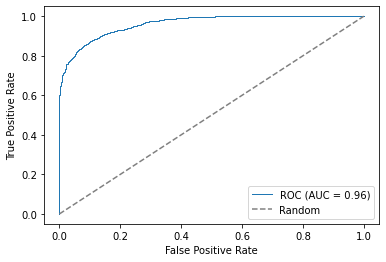

In [16]:
# plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


According to the ROC curve, which is near to the top left corner and has a high AUC value, the model is performing quite well. (close to 1). This shows that, as is ideal for a strong classification model, the model has a high true positive rate while maintaining a low false positive rate.